In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
import seaborn as sns

In [60]:
data = pd.read_csv("typhoon_data.csv", index_col=0)
info = pd.read_csv("typhoon_info.csv", index_col=0)

In [61]:
print(data.shape)
data.sample(5)

(68624, 17)


,International number ID,year,month,day,hour,grade,Latitude of the center,Longitude of the center,Central pressure,Maximum sustained wind speed,Direction of the longest radius of 50kt winds or greater,The longeast radius of 50kt winds or greater,The shortest radius of 50kt winds or greater,Direction of the longest radius of 30kt winds or greater,The longeast radius of 30kt winds or greater,The shortest radius of 30kt winds or greater,Indicator of landfall or passage
41322,9304,1993,7,22,6,Tropical Storm,211,1406,990,45.0,No direction,0.0,0.0,(symmetric circle),90.0,90.0,
50839,302,2003,4,16,6,Typhoon,135,1360,930,90.0,(symmetric circle),120.0,120.0,Northeast,250.0,180.0,
54253,609,2006,8,8,18,Tropical Storm,228,1215,992,40.0,No direction,0.0,0.0,North,70.0,60.0,
57373,1010,2010,9,10,6,Tropical Storm,269,1186,1000,35.0,No direction,0.0,0.0,Southeast,40.0,20.0,
900,5204,1952,7,12,6,Tropical Depression,253,1292,995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


In [62]:
print(info.shape)
info.sample(5)

(1881, 6)


,International number ID,Tropical cyclone number ID,Flag of the last data line,Difference between the time of the last data and the time of the final analysis,Name,Latest Revision
636,7408,NaN,Dissipation,6,GILDA,1989-06-01
1261,9708,9.0,Going out,0,PETER,1998-01-19
1643,1325,30.0,Dissipation,6,NARI,2013-11-18
302,6228,NaN,Going out,0,KAREN,1991-07-16
826,8121,NaN,Dissipation,6,DOYLE,1992-10-21


In [63]:
print(len(data["International number ID"].unique()))

1881


In [64]:
vc = data["International number ID"].value_counts()
print(vc)
print(np.mean(vc))

International number ID
1705    111
116      99
1106     97
1109     94
9612     93
       ... 
210       5
1314      3
7013      3
5620      3
6112      2
Name: count, Length: 1881, dtype: int64
36.482721956406166


In [65]:
info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1881 entries, 0 to 1880
Data columns (total 6 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   International number ID                                                          1881 non-null   int64  
 1   Tropical cyclone number ID                                                       800 non-null    float64
 2   Flag of the last data line                                                       1881 non-null   object 
 3   Difference between the time of the last data and the time of the final analysis  1881 non-null   int64  
 4   Name                                                                             1881 non-null   object 
 5   Latest Revision                                                                  1881 non-null   object 
dtypes: float64(1),

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68624 entries, 0 to 68623
Data columns (total 17 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   International number ID                                   68624 non-null  int64  
 1   year                                                      68624 non-null  int64  
 2   month                                                     68624 non-null  int64  
 3   day                                                       68624 non-null  int64  
 4   hour                                                      68624 non-null  int64  
 5   grade                                                     68624 non-null  object 
 6   Latitude of the center                                    68624 non-null  int64  
 7   Longitude of the center                                   68624 non-null  int64  
 8   Central pressure     

In [67]:
data[data["Maximum sustained wind speed"].isna()]

,International number ID,year,month,day,hour,grade,Latitude of the center,Longitude of the center,Central pressure,Maximum sustained wind speed,Direction of the longest radius of 50kt winds or greater,The longeast radius of 50kt winds or greater,The shortest radius of 50kt winds or greater,Direction of the longest radius of 30kt winds or greater,The longeast radius of 30kt winds or greater,The shortest radius of 30kt winds or greater,Indicator of landfall or passage
0,5101,1951,2,19,6,Tropical Depression,200,1385,1010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
1,5101,1951,2,19,12,Tropical Depression,200,1385,1010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
2,5101,1951,2,19,18,Tropical Depression,230,1421,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
3,5101,1951,2,20,0,Tropical Cyclone of TS intensity or higher,250,1460,994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
4,5101,1951,2,20,6,Tropical Cyclone of TS intensity or higher,276,1506,994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25263,7625,1976,12,9,18,Tropical Cyclone of TS intensity or higher,196,1367,998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
25264,7625,1976,12,10,0,Tropical Cyclone of TS intensity or higher,197,1380,998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
25265,7625,1976,12,10,6,Tropical Cyclone of TS intensity or higher,198,1390,998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
25266,7625,1976,12,10,12,Tropical Depression,199,1400,1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


In [68]:
data[25268:].info()

<class 'pandas.core.frame.DataFrame'>
Index: 43356 entries, 25268 to 68623
Data columns (total 17 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   International number ID                                   43356 non-null  int64  
 1   year                                                      43356 non-null  int64  
 2   month                                                     43356 non-null  int64  
 3   day                                                       43356 non-null  int64  
 4   hour                                                      43356 non-null  int64  
 5   grade                                                     43356 non-null  object 
 6   Latitude of the center                                    43356 non-null  int64  
 7   Longitude of the center                                   43356 non-null  int64  
 8   Central pressure 

In [69]:
data[25277:25283]

,International number ID,year,month,day,hour,grade,Latitude of the center,Longitude of the center,Central pressure,Maximum sustained wind speed,Direction of the longest radius of 50kt winds or greater,The longeast radius of 50kt winds or greater,The shortest radius of 50kt winds or greater,Direction of the longest radius of 30kt winds or greater,The longeast radius of 30kt winds or greater,The shortest radius of 30kt winds or greater,Indicator of landfall or passage
25277,7701,1977,3,29,6,Tropical Storm,78,1553,1002,45.0,No direction,0.0,0.0,(symmetric circle),100.0,100.0,
25278,7701,1977,3,29,12,Tropical Storm,84,1539,1002,40.0,No direction,0.0,0.0,(symmetric circle),50.0,50.0,
25279,7701,1977,3,29,18,Tropical Storm,90,1529,1004,40.0,No direction,0.0,0.0,(symmetric circle),50.0,50.0,
25280,7701,1977,3,30,0,Tropical Depression,95,1516,1006,0.0,NaN,NaN,NaN,NaN,NaN,NaN,
25281,7701,1977,3,30,6,Tropical Depression,97,1510,1006,0.0,NaN,NaN,NaN,NaN,NaN,NaN,
25282,7701,1977,3,30,12,Tropical Depression,98,1506,1008,0.0,NaN,NaN,NaN,NaN,NaN,NaN,


In [70]:
data[data["Direction of the longest radius of 50kt winds or greater"].isna()]["grade"].unique()

array(['Tropical Depression',
       'Tropical Cyclone of TS intensity or higher',
       'Extra-tropical Cyclone',
       'Just entering into the responsible area of RSMC Tokyo-Typhoon Center'],
      dtype=object)

In [71]:
data[data["Direction of the longest radius of 50kt winds or greater"].notna()]["grade"].unique()

array(['Severe Tropical Storm', 'Tropical Storm', 'Typhoon',
       'Just entering into the responsible area of RSMC Tokyo-Typhoon Center'],
      dtype=object)

In [72]:
data[data["year"] < 1977]["grade"].unique()

array(['Tropical Depression',
       'Tropical Cyclone of TS intensity or higher',
       'Extra-tropical Cyclone',
       'Just entering into the responsible area of RSMC Tokyo-Typhoon Center'],
      dtype=object)

In [73]:
data[data["year"] >= 1977]["grade"].unique()

array(['Tropical Depression', 'Severe Tropical Storm', 'Tropical Storm',
       'Extra-tropical Cyclone', 'Typhoon',
       'Just entering into the responsible area of RSMC Tokyo-Typhoon Center'],
      dtype=object)

In [74]:
data = data[data["year"] >= 1977]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43356 entries, 25268 to 68623
Data columns (total 17 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   International number ID                                   43356 non-null  int64  
 1   year                                                      43356 non-null  int64  
 2   month                                                     43356 non-null  int64  
 3   day                                                       43356 non-null  int64  
 4   hour                                                      43356 non-null  int64  
 5   grade                                                     43356 non-null  object 
 6   Latitude of the center                                    43356 non-null  int64  
 7   Longitude of the center                                   43356 non-null  int64  
 8   Central pressure 

In [75]:
print(data[data["Direction of the longest radius of 50kt winds or greater"].notna()]["grade"].unique())
print(data[data["Direction of the longest radius of 50kt winds or greater"].isna()]["grade"].unique())

['Severe Tropical Storm' 'Tropical Storm' 'Typhoon'
 'Just entering into the responsible area of RSMC Tokyo-Typhoon Center']
['Tropical Depression' 'Extra-tropical Cyclone'
 'Just entering into the responsible area of RSMC Tokyo-Typhoon Center']


In [76]:
typhoons = data["International number ID"].unique() # Unique IDs of typhoons
info[info["Name"].str.strip() == "MAEMI"]

,International number ID,Tropical cyclone number ID,Flag of the last data line,Difference between the time of the last data and the time of the final analysis,Name,Latest Revision
1408,314,20.0,Dissipation,6,MAEMI,2004-02-17


In [77]:
maemi_data = data.copy()[data["International number ID"]==314]
maemi_data

,International number ID,year,month,day,hour,grade,Latitude of the center,Longitude of the center,Central pressure,Maximum sustained wind speed,Direction of the longest radius of 50kt winds or greater,The longeast radius of 50kt winds or greater,The shortest radius of 50kt winds or greater,Direction of the longest radius of 30kt winds or greater,The longeast radius of 30kt winds or greater,The shortest radius of 30kt winds or greater,Indicator of landfall or passage
51288,314,2003,9,4,0,Tropical Depression,99,1531,1008,0.0,NaN,NaN,NaN,NaN,NaN,NaN,
51289,314,2003,9,4,6,Tropical Depression,104,1511,1006,0.0,NaN,NaN,NaN,NaN,NaN,NaN,
51290,314,2003,9,4,12,Tropical Depression,109,1497,1006,0.0,NaN,NaN,NaN,NaN,NaN,NaN,
51291,314,2003,9,4,18,Tropical Depression,117,1487,1004,0.0,NaN,NaN,NaN,NaN,NaN,NaN,
51292,314,2003,9,5,0,Tropical Depression,125,1475,1004,0.0,NaN,NaN,NaN,NaN,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51345,314,2003,9,15,0,Extra-tropical Cyclone,488,1506,988,0.0,NaN,NaN,NaN,NaN,NaN,NaN,
51346,314,2003,9,15,6,Extra-tropical Cyclone,490,1511,992,0.0,NaN,NaN,NaN,NaN,NaN,NaN,
51347,314,2003,9,15,12,Extra-tropical Cyclone,492,1514,996,0.0,NaN,NaN,NaN,NaN,NaN,NaN,
51348,314,2003,9,15,18,Extra-tropical Cyclone,489,1525,996,0.0,NaN,NaN,NaN,NaN,NaN,NaN,


In [78]:
maemi_data[30:35]

,International number ID,year,month,day,hour,grade,Latitude of the center,Longitude of the center,Central pressure,Maximum sustained wind speed,Direction of the longest radius of 50kt winds or greater,The longeast radius of 50kt winds or greater,The shortest radius of 50kt winds or greater,Direction of the longest radius of 30kt winds or greater,The longeast radius of 30kt winds or greater,The shortest radius of 30kt winds or greater,Indicator of landfall or passage
51318,314,2003,9,10,18,Typhoon,247,1254,910,105.0,(symmetric circle),80.0,80.0,East,240.0,180.0,
51319,314,2003,9,10,19,Typhoon,248,1254,910,105.0,(symmetric circle),80.0,80.0,East,240.0,200.0,#
51320,314,2003,9,10,21,Typhoon,250,1253,910,105.0,(symmetric circle),80.0,80.0,East,240.0,200.0,
51321,314,2003,9,11,0,Typhoon,252,1251,910,105.0,East,80.0,60.0,East,250.0,200.0,
51322,314,2003,9,11,3,Typhoon,255,1252,920,95.0,East,70.0,50.0,East,250.0,220.0,


In [79]:
maemi_data["Elapsed Hour"] = (maemi_data["day"]-4)*24 + maemi_data["hour"]
maemi_data.head()

,International number ID,year,month,day,hour,grade,Latitude of the center,Longitude of the center,Central pressure,Maximum sustained wind speed,Direction of the longest radius of 50kt winds or greater,The longeast radius of 50kt winds or greater,The shortest radius of 50kt winds or greater,Direction of the longest radius of 30kt winds or greater,The longeast radius of 30kt winds or greater,The shortest radius of 30kt winds or greater,Indicator of landfall or passage,Elapsed Hour
51288,314,2003,9,4,0,Tropical Depression,99,1531,1008,0.0,NaN,NaN,NaN,NaN,NaN,NaN,,0
51289,314,2003,9,4,6,Tropical Depression,104,1511,1006,0.0,NaN,NaN,NaN,NaN,NaN,NaN,,6
51290,314,2003,9,4,12,Tropical Depression,109,1497,1006,0.0,NaN,NaN,NaN,NaN,NaN,NaN,,12
51291,314,2003,9,4,18,Tropical Depression,117,1487,1004,0.0,NaN,NaN,NaN,NaN,NaN,NaN,,18
51292,314,2003,9,5,0,Tropical Depression,125,1475,1004,0.0,NaN,NaN,NaN,NaN,NaN,NaN,,24


In [80]:
maemi_data = maemi_data.drop(["International number ID", "year", "month", "day", "hour"], axis=1)
maemi_data.head()

,grade,Latitude of the center,Longitude of the center,Central pressure,Maximum sustained wind speed,Direction of the longest radius of 50kt winds or greater,The longeast radius of 50kt winds or greater,The shortest radius of 50kt winds or greater,Direction of the longest radius of 30kt winds or greater,The longeast radius of 30kt winds or greater,The shortest radius of 30kt winds or greater,Indicator of landfall or passage,Elapsed Hour
51288,Tropical Depression,99,1531,1008,0.0,NaN,NaN,NaN,NaN,NaN,NaN,,0
51289,Tropical Depression,104,1511,1006,0.0,NaN,NaN,NaN,NaN,NaN,NaN,,6
51290,Tropical Depression,109,1497,1006,0.0,NaN,NaN,NaN,NaN,NaN,NaN,,12
51291,Tropical Depression,117,1487,1004,0.0,NaN,NaN,NaN,NaN,NaN,NaN,,18
51292,Tropical Depression,125,1475,1004,0.0,NaN,NaN,NaN,NaN,NaN,NaN,,24


In [81]:
maemi_data["Longitude of the center"] /= 10
maemi_data["Latitude of the center"] /= 10

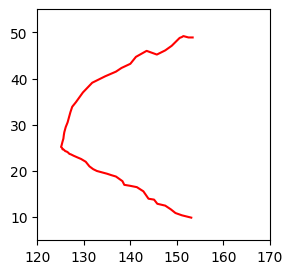

In [82]:
fig = plt.figure(figsize=(3,3))
plt.xlim(120, 170)
plt.ylim(5, 55)
plt.plot(maemi_data["Longitude of the center"], maemi_data["Latitude of the center"], "red")
plt.show()

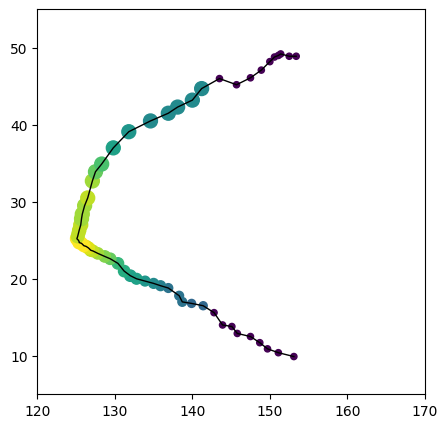

In [83]:
scale = maemi_data["The longeast radius of 30kt winds or greater"].fillna(60)
fig = plt.figure(figsize=(5,5))
plt.xlim(120, 170)
plt.ylim(5, 55)
plt.plot(maemi_data["Longitude of the center"], maemi_data["Latitude of the center"], "black", linewidth=1)
plt.scatter(maemi_data["Longitude of the center"], maemi_data["Latitude of the center"], s=scale/3, c=maemi_data["Maximum sustained wind speed"])
plt.show()

In [84]:
# Color map
import matplotlib as mpl
import matplotlib.cm as cm

c = maemi_data.copy()["Maximum sustained wind speed"]
cmap = cm.jet

In [85]:
def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb
m = folium.Map(location=[38.9, 153.2], zoom_start=3, width=600, height=600)
for i in range(len(maemi_data)):
    color = cmap(c.iloc[i]/c.max())
    color = tuple([int(c*255) for c in color[:3]])
    color = rgb_to_hex(color)
    folium.Circle(location=[maemi_data.iloc[i]["Latitude of the center"], maemi_data.iloc[i]["Longitude of the center"]],
                 radius=scale.iloc[i]*1852,  #  nautical mile to meter
                 fill=True,
                 color="black",
                 fill_color=color).add_to(m)
m

/tmp/ipykernel_10296/1035414605.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


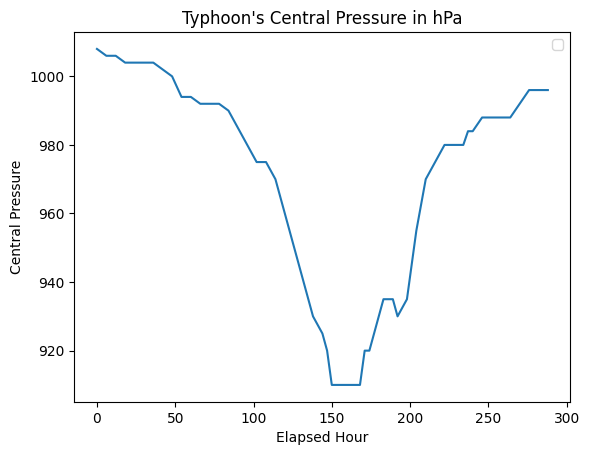

In [86]:
plt.title("Typhoon's Central Pressure in hPa")
plt.plot(maemi_data["Elapsed Hour"],maemi_data["Central pressure"])
plt.xlabel("Elapsed Hour")
plt.ylabel("Central Pressure")
plt.legend()
plt.show()

/tmp/ipykernel_10296/525025759.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


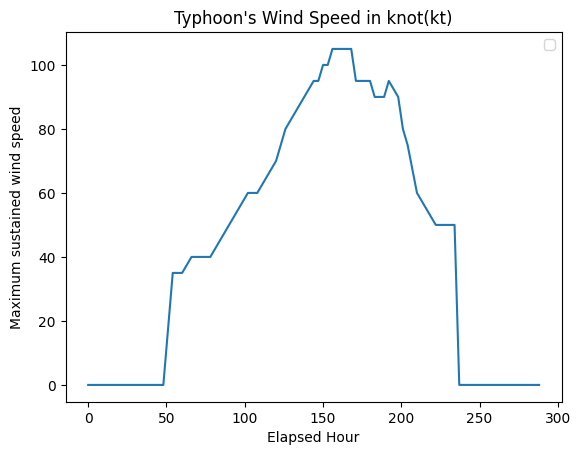

In [87]:
plt.title("Typhoon's Wind Speed in knot(kt)")
plt.plot(maemi_data["Elapsed Hour"],maemi_data["Maximum sustained wind speed"])
plt.xlabel("Elapsed Hour")
plt.ylabel("Maximum sustained wind speed")
plt.legend()
plt.show()